## Before you start :
   - These exercises are related to the Exploratory data analysis using matplotlib and seaborn.
   - The datasets for Challenge 2 and 3 are provided in the `your-code` folder of this lab.
   - Elaborate your codes and outputs as much as you can.
   - Try your best to answer the questions and complete the tasks and most importantly enjoy the process!!!

# Challenge 1

Answer all questions by drawing a graph. Then explain.

In [2]:
import seaborn as sns
import pandas as pd

**0. Load seaborn dataset "tips"**

In [3]:
sns.load_dataset("tips")

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


**1. What is the prefered day for eating?**

<AxesSubplot:xlabel='day', ylabel='count'>

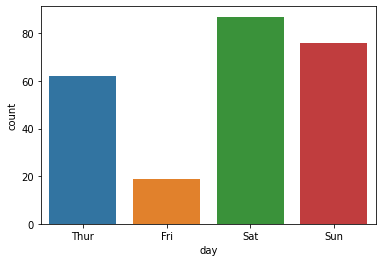

In [4]:
tips = sns.load_dataset("tips")

sns.countplot(x=tips.day)

**2. What days of the week has more men than women payers?**

<AxesSubplot:xlabel='day', ylabel='count'>

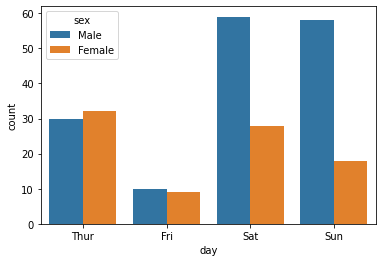

In [5]:
sns.countplot(x = tips.day, hue = tips.sex)

**3. Do you think bill amounts change considerably depending on smoking?**

In [6]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


<AxesSubplot:xlabel='total_bill', ylabel='Density'>

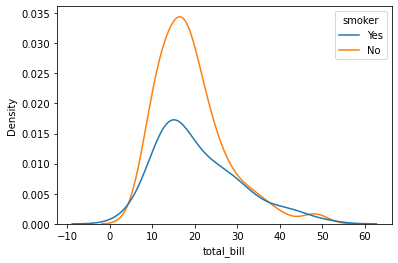

In [7]:
sns.kdeplot(x=tips.total_bill, hue=tips.smoker)

**4. Is tip correlated to total_bill? Draw a scatter plot**

In [8]:
tips.corr()

,total_bill,tip,size
total_bill,1.000000,0.675734,0.598315
tip,0.675734,1.000000,0.489299
size,0.598315,0.489299,1.000000


<AxesSubplot:xlabel='total_bill', ylabel='tip'>

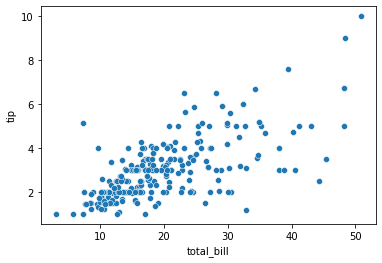

In [9]:
sns.scatterplot(x = "total_bill", y = "tip", data = tips)

**BONUS**: Draw a graph of your choice with 2 numerical variables and 2 categorical variable (HINT: use `hue` and `style`). Do you find it useful?

<AxesSubplot:xlabel='total_bill', ylabel='tip'>

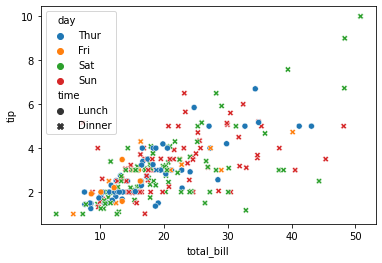

In [11]:
sns.scatterplot(x = "total_bill", y = "tip", hue = tips.day, style = "time", data = tips)

In [14]:
day_gender_payers = tips.groupby("day").sex.value_counts()

In [15]:
day_gender_payers.index

MultiIndex([('Thur', 'Female'),
            ('Thur',   'Male'),
            ( 'Fri',   'Male'),
            ( 'Fri', 'Female'),
            ( 'Sat',   'Male'),
            ( 'Sat', 'Female'),
            ( 'Sun',   'Male'),
            ( 'Sun', 'Female')],
           names=['day', 'sex'])

In [16]:
day_gender_payers["Thur", "Male"]

30

In [19]:
df = day_gender_payers.to_frame().rename(columns={"sex": "count"}).reset_index()

In [21]:
df

,day,sex,count
0,Thur,Female,32
1,Thur,Male,30
2,Fri,Male,10
3,Fri,Female,9
4,Sat,Male,59
5,Sat,Female,28
6,Sun,Male,58
7,Sun,Female,18


In [20]:
# Pivot return reshaped DataFrame organized by given index / column values
pd.pivot(data = df, index = "day", columns = "sex")

count       
sex   Male Female
day              
Thur    30     32
Fri     10      9
Sat     59     28
Sun     58     18